# Set up data and imports

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# List of features of a song
feature_list = ['BPM', 'Energy', 'Danceability', 'Loudness(dB)', 'Liveness',
                 'Valence', 'Length', 'Acousticness', 'Speechiness']



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/top50spotify2019/top50.csv


In [3]:
filename='top50.csv'
spotify_data=pd.read_csv(filename,encoding='ISO-8859-1')
spotify_data.head(100)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


# Clean the Data

In [4]:
# Rename the data
spotify_data.rename(columns={'Track.Name':'track_name',
                   'Artist.Name':'artist_name',
                   'Beats.Per.Minute':'BPM',
                   'Loudness..dB..':'Loudness(dB)',
                   'Valence.':'Valence','Length.':'Length', 
                   'Acousticness..':'Acousticness',
                   'Speechiness.':'Speechiness'},inplace=True)

# Drop unneeded columns
spotify_data.drop(['track_name','Unnamed: 0','artist_name','Genre'],axis=1,inplace=True)
print(spotify_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BPM           50 non-null     int64
 1   Energy        50 non-null     int64
 2   Danceability  50 non-null     int64
 3   Loudness(dB)  50 non-null     int64
 4   Liveness      50 non-null     int64
 5   Valence       50 non-null     int64
 6   Length        50 non-null     int64
 7   Acousticness  50 non-null     int64
 8   Speechiness   50 non-null     int64
 9   Popularity    50 non-null     int64
dtypes: int64(10)
memory usage: 4.0 KB
None


# Line Plot

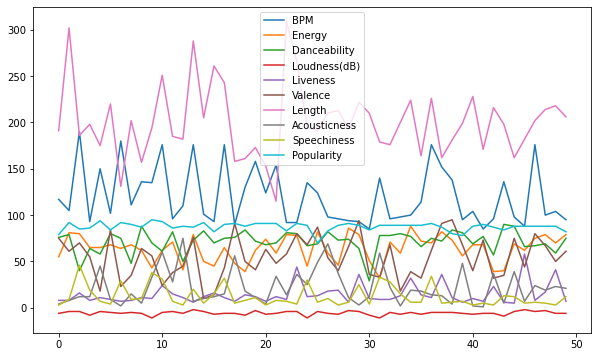

In [5]:
spotify_data.head()

# Width and height of figure
plt.figure(figsize=(10,6))
sns.lineplot(data=spotify_data, dashes=False)

# Heatmap

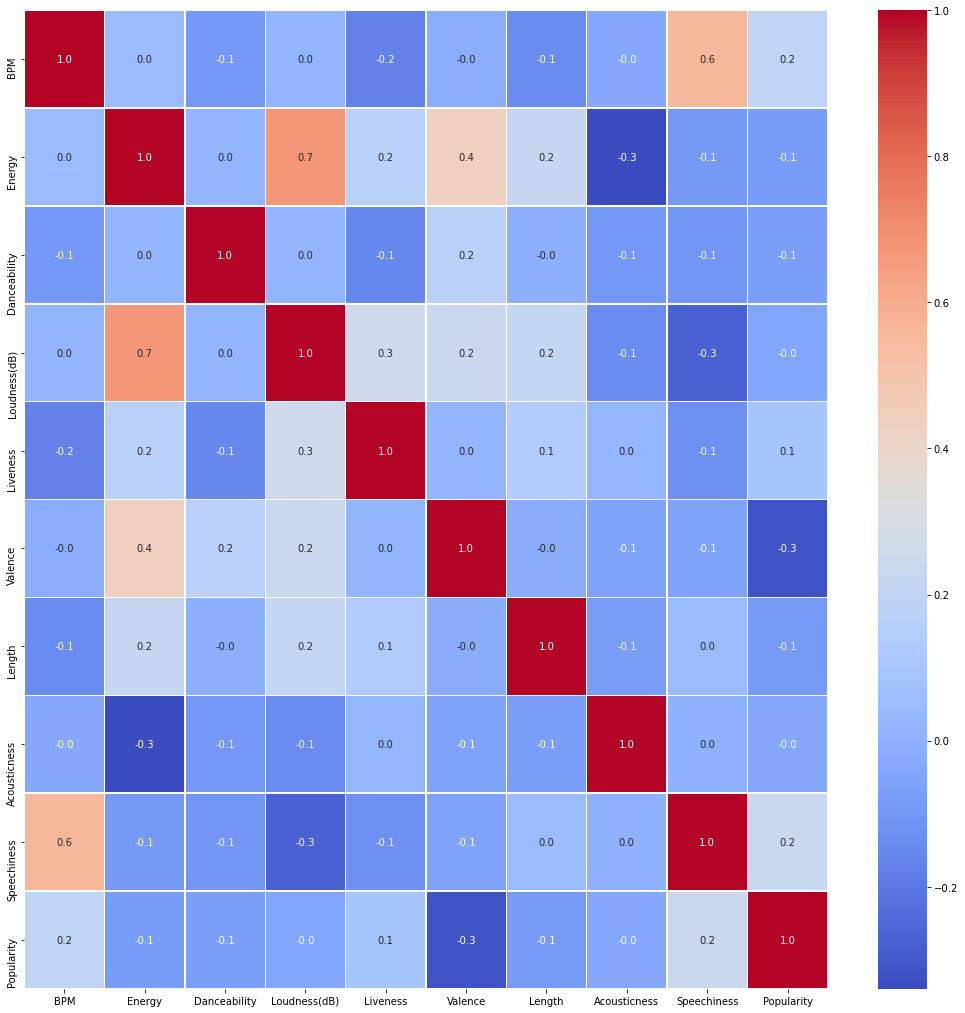

In [6]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(spotify_data.corr(), cmap="coolwarm", annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Interactive: Bivariate Density Plot Between Popularity and Another Value

In [7]:
# Displays a plotted graph between popularity and the chosen feature
def create_plot_graph(feature):
    figure = plt.subplots(figsize=(10,10))
    plt.title('Dependency between Popularity and {}'.format(feature))
    sns.regplot(x=feature, y ='Popularity',
                ci=None, data=spotify_data)
    sns.kdeplot(spotify_data[feature], spotify_data.Popularity)

# Return a plotted graph between popularity and the param
def choose_features(Feature):
    return create_plot_graph(Feature)

# Display a drop down with a list of features
interact(choose_features, Feature = feature_list)

interactive(children=(Dropdown(description='Feature', options=('BPM', 'Energy', 'Danceability', 'Loudness(dB)'…

<function __main__.choose_features(Feature)>

# Mean of Features

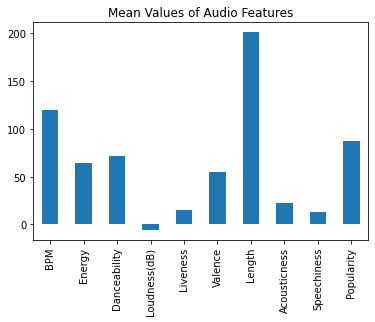

In [10]:
spotify_data.mean().plot.bar()
plt.title('Mean Values of Audio Features')
plt.show()

# Interactive Prediction Model: Linear Regression

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Set prediction target which will be Popularity
y = spotify_data.Popularity

# Features used to predict
features = ["BPM", "Energy", "Danceability"
            ,"Loudness(dB)", "Liveness", "Valence","Length","Acousticness"
            ,"Speechiness"]

X = spotify_data[features]

# Set up dict of the range of values for each song feature
# The range of values is used for the user to choose from
feature_dict = [ ['BPM', [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]],
                 ['Energy', [30, 40, 50, 60, 70, 80, 90]],
                 ['Danceability', [10, 20, 30, 40, 50, 60, 70, 80, 90]],
                 ['Loudness(dB)', [-11, -9, -7 ,5, -4, -2, 0]],
                 ['Liveness', [0, 10, 20, 30, 40, 50]],
                 ['Valence', [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]],
                 ['Length', [100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300]],
                 ['Acousticness', [0, 10, 20, 30, 40, 50, 60]],
                 ['Speechiness', [0, 5, 10, 15, 20, 25, 30, 35, 40]] ]

# The current array being used as the feature value drop down box
current_dropdown = feature_dict[0][1]

# The chosen feature (default to BPM)
chosen_feature = 'BPM'

# Called when user chooses a value for the feature chosen
# Begins the prediction of popularity
def begin_prediction(Value):
    # Begin prediction
    global chosen_feature
    print('Prediction for: {} - {}'.format(chosen_feature, Value))
    
    # Split into validation and training data
    train_X, val_X, train_y, val_y = train_test_split(X, y)
    model = linear_model.LinearRegression()
    train_X[chosen_feature] = Value
    model.fit(train_X, train_y)
    
    # Predict popularity
    lm_predict = model.predict(val_X)
    print(lm_predict)    
    
    # Calculate error
    print('\n\nCALCULATING ERROR...')
    print('Mean Absolute Error:', metrics.mean_absolute_error(val_y, lm_predict))
    print('Mean Squared Error:', metrics.mean_squared_error(val_y, lm_predict))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y, lm_predict)))

# Is called when user clicks a feature from the dropdown list
# Will display another dropdown list of a different range of values depending on which feature is chosen
def setup_feature_pick(Feature):
    global current_dropdown
    global chosen_feature
    feature_index = feature_list.index(Feature) # Retrieve the index of the chosen feature
    current_dropdown = feature_dict[feature_index][1] # Update the global current dropdown of feature vals
    chosen_feature = Feature # Update the chosen feature to be used in the prediction model
    interact(begin_prediction, Value = current_dropdown) # Init a new dropdown containing the chosen feature val array


# Dropdown list of features. Inits another dropdown list of values 
interact(setup_feature_pick, Feature = feature_list)

interactive(children=(Dropdown(description='Feature', options=('BPM', 'Energy', 'Danceability', 'Loudness(dB)'…

<function __main__.setup_feature_pick(Feature)>